O seguinte Projeto tem como objetivo praticar os conceitos e teorias aprendidas na disciplina de Redes Neurais a respeito

TODO
1. Melhorar comentarios para que projeto sirva de entrega
2. Implementar early stopping no svc
3. Rodar projeto com numero alto de trials e interacoes, esta primeira rodada eh so para testar se nada quebra

#Organização e separação dos dados

Nesse passo do projeto, fizemos a coleta do dataset e logo após os dividimos em 3 conjuntos distintos, dataset para treinamento, validação e testes

In [1]:

import numpy as np
import pandas as pd
import sys
import os
import optuna
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from tensorflow.keras import layers, optimizers, losses
from sklearn.neural_network import MLPClassifier
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from tensorflow import keras
from keras.models import Model
from keras import layers, optimizers, losses
# from tensorflow.keras import layers, optimizers, losses
from sklearn.neural_network import MLPClassifier
from scipy import stats
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, BaggingClassifier, VotingClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV

2023-04-23 12:40:20.056233: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-23 12:40:20.097115: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-23 12:40:20.332184: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-23 12:40:20.334011: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-23 12:40:20.989895: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

In [2]:

dataset = pd.read_csv('TRNcod.xls', delimiter = "\t")

Abaixo pre processamos os dados
1. Separamos duas classes
2. Damos shuffle
3. Fazemos a divisao 50/25/25

In [3]:
dataset 

,INDEX,UF_1,UF_2,UF_3,UF_4,UF_5,UF_6,UF_7,IDADE,SEXO_1,...,CEP4_7,CEP4_8,CEP4_9,CEP4_10,CEP4_11,CEP4_12,CEP4_13,CEP4_14,IND_BOM_1_1,IND_BOM_1_2
0,0,1,1,1,0,0,0,0,0.135098,1,...,0,0,1,1,0,1,1,1,0,1
1,1,1,0,1,0,0,1,0,0.273504,1,...,0,1,0,1,1,0,0,0,1,0
2,2,1,0,1,0,0,1,0,0.281910,0,...,1,1,0,0,0,0,1,0,1,0
3,3,1,1,1,0,0,0,0,0.225741,0,...,1,1,0,1,1,0,1,0,1,0
4,4,1,1,0,0,0,1,0,0.480403,0,...,1,1,1,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389191,389191,1,1,0,0,0,0,1,0.787827,1,...,0,1,1,1,1,1,0,1,0,1
389192,389192,1,0,1,0,0,0,1,0.470010,1,...,1,0,1,0,1,0,1,1,1,0
389193,389193,0,1,0,1,0,0,1,0.436048,0,...,1,0,0,1,0,1,1,0,0,1
389194,389194,1,0,1,0,1,0,0,0.677875,0,...,0,1,0,0,0,1,1,1,1,0


In [4]:
dataset[(dataset['IND_BOM_1_1']==1) & (dataset['IND_BOM_1_2']==1)]

,INDEX,UF_1,UF_2,UF_3,UF_4,UF_5,UF_6,UF_7,IDADE,SEXO_1,...,CEP4_7,CEP4_8,CEP4_9,CEP4_10,CEP4_11,CEP4_12,CEP4_13,CEP4_14,IND_BOM_1_1,IND_BOM_1_2


In [5]:
dataset[dataset['IND_BOM_1_1']==1].groupby("IND_BOM_1_2").count()

,INDEX,UF_1,UF_2,UF_3,UF_4,UF_5,UF_6,UF_7,IDADE,SEXO_1,...,CEP4_6,CEP4_7,CEP4_8,CEP4_9,CEP4_10,CEP4_11,CEP4_12,CEP4_13,CEP4_14,IND_BOM_1_1
IND_BOM_1_2,,,,,,,,,,,,,,,,,,,,,
0,255098,255098,255098,255098,255098,255098,255098,255098,255098,255098,...,255098,255098,255098,255098,255098,255098,255098,255098,255098,255098


In [6]:
dataset[dataset['IND_BOM_1_2']==1].groupby("IND_BOM_1_1").count()

,INDEX,UF_1,UF_2,UF_3,UF_4,UF_5,UF_6,UF_7,IDADE,SEXO_1,...,CEP4_6,CEP4_7,CEP4_8,CEP4_9,CEP4_10,CEP4_11,CEP4_12,CEP4_13,CEP4_14,IND_BOM_1_2
IND_BOM_1_1,,,,,,,,,,,,,,,,,,,,,
0,134098,134098,134098,134098,134098,134098,134098,134098,134098,134098,...,134098,134098,134098,134098,134098,134098,134098,134098,134098,134098


In [7]:
dataset.drop(columns=['INDEX'], inplace=True)

In [8]:
dataset.describe()

,UF_1,UF_2,UF_3,UF_4,UF_5,UF_6,UF_7,IDADE,SEXO_1,NIVEL_RELACIONAMENTO_CREDITO01,...,CEP4_7,CEP4_8,CEP4_9,CEP4_10,CEP4_11,CEP4_12,CEP4_13,CEP4_14,IND_BOM_1_1,IND_BOM_1_2
count,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,3.891960e+05,389196.000000,389196.000000,...,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000
mean,0.889274,0.691952,0.476552,0.296195,0.241179,0.218011,0.186836,4.552049e-01,0.521514,0.134915,...,0.423378,0.417540,0.425708,0.459820,0.440842,0.436896,0.433709,0.440339,0.655449,0.344551
std,0.313793,0.461687,0.499451,0.456579,0.427799,0.412895,0.389781,2.537459e-01,0.499538,0.133136,...,0.494095,0.493154,0.494451,0.498384,0.496489,0.496002,0.495587,0.496428,0.475222,0.475222
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.506237e-16,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.507866e-01,0.000000,0.111111,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.375241e-01,1.000000,0.111111,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,6.578835e-01,1.000000,0.111111,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
print("Separando classes...")
class_1 = dataset[dataset['IND_BOM_1_1']==1]
class_2 = dataset[dataset['IND_BOM_1_2']==1]
class_1 = class_1.sample(frac=1)
class_2 = class_2.sample(frac=1)

Separando classes...


In [10]:
print("Dividindo dados em treinamento, validação e teste")
class_1_train, class_1_validate, class_1_test = np.split(class_1,[int(0.5*len(class_1)),int(0.75*len(class_1))])
class_2_train, class_2_validate, class_2_test = np.split(class_2,[int(0.5*len(class_2)),int(0.75*len(class_2))])  

Dividindo dados em treinamento, validação e teste


In [11]:
print("Classe 1 - ","Treino:",len(class_1_train),"Validação:",len(class_1_validate),"Teste:",len(class_1_test))
print("Classe 2 - ","Treino:",len(class_2_train),"Validação:",len(class_2_validate),"Teste:",len(class_2_test))

Classe 1 -  Treino: 127549 Validação: 63774 Teste: 63775
Classe 2 -  Treino: 67049 Validação: 33524 Teste: 33525


In [12]:
print("Repetindo dados de treino e validação da classe 2")
while len(class_2_train) < len(class_1_train):
  count = (len(class_1_train)-len(class_2_train)) % len(class_2_train)
  class_2_train = pd.concat([class_2_train[:count],class_2_train])
while len(class_2_validate) < len(class_1_validate):
  count = (len(class_1_validate)-len(class_2_validate)) % len(class_2_validate)
  class_2_validate = pd.concat([class_2_validate[:count],class_2_validate])


Repetindo dados de treino e validação da classe 2


In [13]:
print("Classe 1 - ","Treino:",len(class_1_train),"Validação:",len(class_1_validate),"Teste:",len(class_1_test))
print("Classe 2 - ","Treino:",len(class_2_train),"Validação:",len(class_2_validate),"Teste:",len(class_2_test))

Classe 1 -  Treino: 127549 Validação: 63774 Teste: 63775
Classe 2 -  Treino: 127549 Validação: 63774 Teste: 33525


In [14]:
print("Juntandos dados das classes de acordo com o tipo de separação")
data_train = pd.concat([class_1_train,class_2_train])
data_train = data_train.sample(frac=1)
data_validate = pd.concat([class_1_validate,class_2_validate])
data_validate = data_validate.sample(frac=1)
data_test = pd.concat([class_1_test,class_2_test])
data_test = data_test.sample(frac=1)

Juntandos dados das classes de acordo com o tipo de separação


In [15]:
print("Treinamento:",len(data_train),"Validação:",len(data_validate),"Teste:",len(data_test))

Treinamento: 255098 Validação: 127548 Teste: 97300


In [16]:
print(data_train.iloc[0])

UF_1           0.0
UF_2           1.0
UF_3           1.0
UF_4           0.0
UF_5           0.0
              ... 
CEP4_12        1.0
CEP4_13        0.0
CEP4_14        1.0
IND_BOM_1_1    0.0
IND_BOM_1_2    1.0
Name: 272438, Length: 245, dtype: float64


In [17]:
x_train = data_train.iloc[:,:-2]
y_train = data_train.iloc[:,-2:]
x_validate = data_validate.iloc[:,:-2]
y_validate = data_validate.iloc[:,-2:]
x_test = data_test.iloc[:,:-2]
y_test = data_test.iloc[:,-2:]

In [18]:
y_train[(y_train['IND_BOM_1_1']==1) & (y_train['IND_BOM_1_2']==1)]

,IND_BOM_1_1,IND_BOM_1_2


In [19]:
y_validate[(y_validate['IND_BOM_1_1']==1) & (y_validate['IND_BOM_1_2']==1)]

,IND_BOM_1_1,IND_BOM_1_2


In [20]:
y_test[(y_test['IND_BOM_1_1']==1) & (y_test['IND_BOM_1_2']==1)]

,IND_BOM_1_1,IND_BOM_1_2


In [21]:
y_train2 = y_train.drop(columns=['IND_BOM_1_2'])
y_validate2 = y_validate.drop(columns=['IND_BOM_1_2'])
y_test2 = y_test.drop(columns=['IND_BOM_1_2'])

In [22]:
y_train2[y_train2['IND_BOM_1_1']==1].count()

IND_BOM_1_1    127549
dtype: int64

In [23]:
y_train2[y_train2['IND_BOM_1_1']==0].count()

IND_BOM_1_1    127549
dtype: int64

In [24]:
y_validate2[y_validate2['IND_BOM_1_1']==1].count()

IND_BOM_1_1    63774
dtype: int64

In [25]:
y_validate2[y_validate2['IND_BOM_1_1']==0].count()

IND_BOM_1_1    63774
dtype: int64

In [26]:
y_test2[y_test2['IND_BOM_1_1']==1].count()

IND_BOM_1_1    63775
dtype: int64

In [27]:
y_test2[y_test2['IND_BOM_1_1']==0].count()

IND_BOM_1_1    33525
dtype: int64

Com os processamentos realizados acima, obtemos os datasets mencionados e estamos prontos para iniciar as nossas análises com os classificadores.

#Classificadores

In [28]:

from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, roc_curve, roc_auc_score, average_precision_score, ConfusionMatrixDisplay, auc
from sklearn.metrics import accuracy_score
import scikitplot as skplt
import matplotlib.pyplot as plt
import tensorflow as tf

A função abaixo será usada para geração da F1-Score, matriz de confusão, MSE (mean squared error), AUROC e precisão média

In [29]:
def my_metrics(y_true,y_pred):
  y_true = y_true['IND_BOM_1_1']
  y_pred = y_pred['IND_BOM_1_1']
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred, normalize='true')
  print(classification_report(y_true,y_pred))
  print("Erro quadrático médio: ",mean_squared_error(y_true,y_pred))
  print("Auroc:", roc_auc_score(y_true,y_pred))
  print("Precisão média: ", average_precision_score(y_true, y_pred))
  print()
  

In [30]:
def pred_name_columns(arr):
    result = pd.DataFrame(arr, columns = ['IND_BOM_1_1'])
    return result

In [31]:
def pred_scores_transf(arr):
  pred_score = []
  for a,b in arr:
    if a > b:
      pred_score.append([1,0])
    else:
      pred_score.append([0,1])
  
  return pred_name_columns(pred_score)

In [32]:
@tf.function
def ks(y_true,y_pred):
    y_true = tf.reshape(y_true,(-1,))
    y_pred = tf.reshape(y_pred,(-1,))
    length = tf.shape(y_true)[0]
    t = tf.math.top_k(y_pred,k = length,sorted =False)
    y_pred_sorted = tf.gather(y_pred,t.indices)
    y_true_sorted = tf.gather(y_true,t.indices)
    cum_positive_ratio = tf.truediv(
        tf.cumsum(y_true_sorted),tf.reduce_sum(y_true_sorted))
    cum_negative_ratio = tf.truediv(
        tf.cumsum(1- y_true_sorted),tf.reduce_sum(1- y_true_sorted))
    ks_value = tf.reduce_max(tf.abs(cum_positive_ratio - cum_negative_ratio))
    return ks_value

In [33]:
sys.exit("Execution stopped. Please run cells above this one individually.")

SystemExit: Execution stopped. Please run cells above this one individually.

/home/pedro-milet/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3513: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


##MLP

In [33]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from tensorflow.keras import layers, optimizers, losses
from sklearn.neural_network import MLPClassifier
from scipy import stats

In [34]:
input_dim = x_train.shape[1]

No passo abaixo utilizamos o optuna para tentar fazer a busca pelos melhores parâmetros da MLP

In [35]:
def mlp(trial):
    layers              = trial.suggest_int('layers', 1, 2, 3)
    solver              = trial.suggest_categorical('solver', ['lbfgs', 'sgd', 'adam'])
    neurons             = trial.suggest_int('neurons', 32, 50, 100)
    activation          = trial.suggest_categorical('activation', ['identity', 'logistic', 'tanh', 'relu'])
    learning_rate       = trial.suggest_categorical('learning rate', ['constant', 'adaptive'])
    learning_rate_init  = trial.suggest_float('initial learning rate', 0.001, 0.01)
    mlp = MLPClassifier(random_state=1, 
                    max_iter=10000,
                    solver=solver,
                    activation=activation,
                    learning_rate=learning_rate,
                    hidden_layer_sizes=(neurons,) if layers==1 else (neurons, neurons),
                    learning_rate_init=learning_rate_init, 
                    early_stopping=True).fit(x_train.to_numpy(), y_train2.to_numpy().ravel())

    mlp_pred_class_test = mlp.predict(x_test.to_numpy())

    y_pred_mlp_test = pred_name_columns(mlp_pred_class_test)

    acc = accuracy_score(y_test2,y_pred_mlp_test)
    return acc

study_0 = optuna.create_study(direction="maximize")
study_0.optimize(mlp, n_trials=32)

[I 2023-04-18 18:18:10,093] A new study created in memory with name: no-name-beaa535a-cbf2-4c28-a31b-010ecb0b50dd
/home/pedro-milet/.local/lib/python3.8/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [1, 2] and step=3, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
/home/pedro-milet/.local/lib/python3.8/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [32, 50] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 32].
  warnings.warn(
[I 2023-04-18 18:19:44,221] Trial 0 finished with value: 0.6282425488180884 and parameters: {'layers': 1, 'solver': 'sgd', 'neurons': 32, 'activation': 'logistic', 'learning rate': 'constant', 'initial learning rate': 0.002550509089354604}. Best is trial 0 with value: 0.6282425488180884.
/home/pedro-milet/.local/lib/python3.8/site-packages/optuna/distributions.py:716: UserWarning: The distribution is sp

[I 2023-04-18 19:31:09,936] Trial 10 finished with value: 0.6110277492291881 and parameters: {'layers': 1, 'solver': 'lbfgs', 'neurons': 32, 'activation': 'tanh', 'learning rate': 'constant', 'initial learning rate': 0.0012601935104176352}. Best is trial 9 with value: 0.6330626927029804.
/home/pedro-milet/.local/lib/python3.8/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [1, 2] and step=3, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
/home/pedro-milet/.local/lib/python3.8/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [32, 50] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 32].
  warnings.warn(
[I 2023-04-18 20:12:40,273] Trial 11 finished with value: 0.6110277492291881 and parameters: {'layers': 1, 'solver': 'lbfgs', 'neurons': 32, 'activation': 'logistic', 'learning rate': 'constant', 'initial learning rate': 0.00303817

[I 2023-04-18 21:18:05,317] Trial 21 finished with value: 0.6343371017471737 and parameters: {'layers': 1, 'solver': 'adam', 'neurons': 32, 'activation': 'tanh', 'learning rate': 'constant', 'initial learning rate': 0.001883412046609875}. Best is trial 19 with value: 0.6357965056526208.
/home/pedro-milet/.local/lib/python3.8/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [1, 2] and step=3, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
/home/pedro-milet/.local/lib/python3.8/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [32, 50] and step=100, but the range is not divisible by `step`. It will be replaced by [32, 32].
  warnings.warn(
[I 2023-04-18 21:18:27,456] Trial 22 finished with value: 0.6357245632065776 and parameters: {'layers': 1, 'solver': 'adam', 'neurons': 32, 'activation': 'tanh', 'learning rate': 'constant', 'initial learning rate': 0.00200546192965

In [36]:
study_0.best_params

{'layers': 1,
 'solver': 'adam',
 'neurons': 32,
 'activation': 'tanh',
 'learning rate': 'constant',
 'initial learning rate': 0.0020309459418264213}

Melhor resultado 1 {'layers': 1,
 'solver': 'sgd',
 'neurons': 13,
 'activation': 'logistic',
 'learning rate': 'adaptive',
 'initial learning rate': 0.0856084197423055}

Melhor resultado 2 {'layers': 1,
 'solver': 'adam',
 'neurons': 32,
 'activation': 'tanh',
 'learning rate': 'constant',
 'initial learning rate': 0.0020309459418264213}

In [ ]:
sys.exit("Execution stopped. Please run cells above this one individually.")

In [35]:
mlp_opt = MLPClassifier(random_state=1, 
                    max_iter=10000,
                    solver='sgd',
                    activation='logistic',
                    learning_rate= 'adaptive',
                    learning_rate_init=0.0856084197423055,
                    hidden_layer_sizes=(13),
                    early_stopping=True).fit(x_train.to_numpy(), y_train2.to_numpy().ravel())

/home/pedro-milet/.local/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.48      0.65      0.55     33525
           1       0.77      0.62      0.69     63775

    accuracy                           0.63     97300
   macro avg       0.62      0.64      0.62     97300
weighted avg       0.67      0.63      0.64     97300

Erro quadrático médio:  0.3668550873586845
Auroc: 0.6376003503180896
Precisão média:  0.7287491864489613



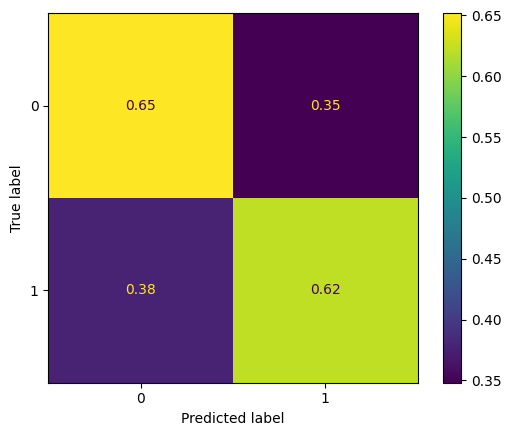

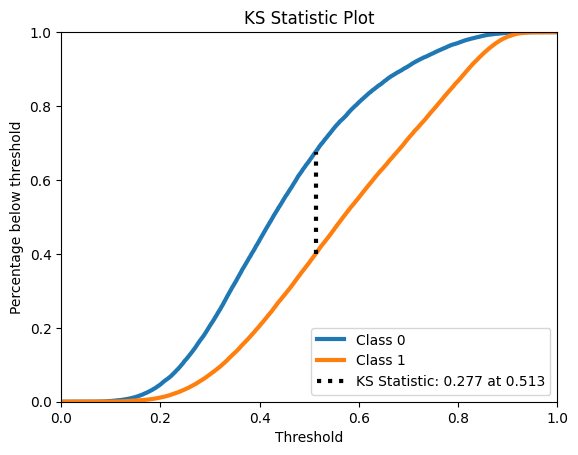

In [36]:
mlp_pred_class_test = mlp_opt.predict(x_test.to_numpy())
mlp_prb_test = mlp_opt.predict_proba(x_test)
y_pred_mlp_test = pred_name_columns(mlp_pred_class_test)
my_metrics(y_test2,y_pred_mlp_test)
skplt.metrics.plot_ks_statistic(y_test2.to_numpy().ravel(), mlp_prb_test)
plt.show()

KS de 0.277 , auroc 0.63 , precisao 0.72
Podemos melhorar.

In [37]:
mlp_opt2 = MLPClassifier(random_state=1, 
                    max_iter=10000,
                    solver='sgd',
                    activation='logistic',
                    learning_rate= 'adaptive',
                    learning_rate_init=0.0856084197423055,
                    hidden_layer_sizes=(32),
                    early_stopping=True).fit(x_train.to_numpy(), y_train2.to_numpy().ravel())

/home/pedro-milet/.local/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.47      0.68      0.56     33525
           1       0.78      0.60      0.68     63775

    accuracy                           0.63     97300
   macro avg       0.63      0.64      0.62     97300
weighted avg       0.67      0.63      0.63     97300

Erro quadrático médio:  0.37440904419321686
Auroc: 0.6389191587805634
Precisão média:  0.7301987137103825



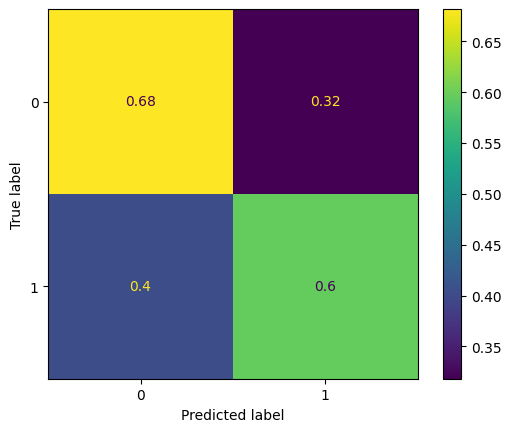

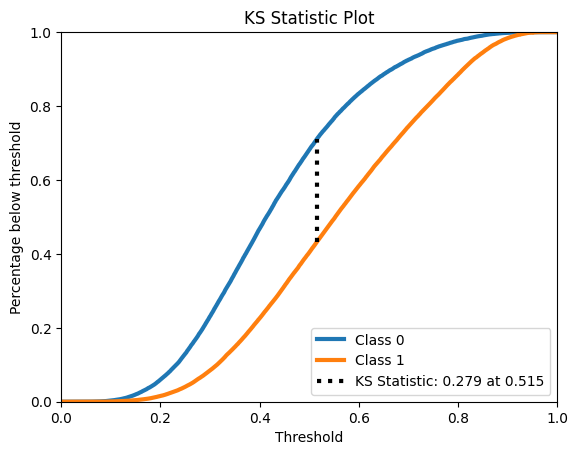

In [38]:
mlp_pred_class_test = mlp_opt2.predict(x_test.to_numpy())
mlp_prb_test = mlp_opt2.predict_proba(x_test)
y_pred_mlp_test = pred_name_columns(mlp_pred_class_test)
my_metrics(y_test2,y_pred_mlp_test)
skplt.metrics.plot_ks_statistic(y_test2.to_numpy().ravel(), mlp_prb_test)
plt.show()

KS de 0.279 , auroc 0.638 , precisao 0.730
Resultados melhoraram principalmente pois aumentamos o numero de neuronios, mas a primeira rede custa muito menos.

In [ ]:
sys.exit("Execution stopped. Please run cells above this one individually.")

##Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
def rf(trial):
    max_depth           = trial.suggest_int("max_depth", 2, 16)
    criterion           = trial.suggest_categorical("criterion", ["gini", "entropy"])
    n_estimators        = trial.suggest_int("n_estimators", 8, 32)
    min_samples_leaf    = trial.suggest_int("min_samples_leaf", 2, 8)
    min_samples_split   = trial.suggest_int("min_samples_split", 2, 8)
    random_forest = RandomForestClassifier(n_estimators=n_estimators, 
                                        max_depth=max_depth, 
                                        criterion=criterion, 
                                        bootstrap=True, 
                                        min_samples_leaf=min_samples_leaf, 
                                        min_samples_split=min_samples_split).fit(x_train.to_numpy(), y_train2.to_numpy().ravel())

    rf_pred_class_test = random_forest.predict(x_test.to_numpy())
    y_pred_rf_test = pred_name_columns(rf_pred_class_test)

    acc = accuracy_score(y_test2,y_pred_rf_test)
    return acc


study_1 = optuna.create_study(direction="maximize")
study_1.optimize(rf, n_trials=16)

[I 2023-04-11 02:30:24,801] A new study created in memory with name: no-name-2747b1b4-57dd-4a8c-af6b-76ac761a1344
[I 2023-04-11 02:30:34,309] Trial 0 finished with value: 0.6126824254881809 and parameters: {'max_depth': 9, 'criterion': 'entropy', 'n_estimators': 12, 'min_samples_leaf': 6, 'min_samples_split': 7}. Best is trial 0 with value: 0.6126824254881809.
[I 2023-04-11 02:30:41,742] Trial 1 finished with value: 0.579393627954779 and parameters: {'max_depth': 3, 'criterion': 'entropy', 'n_estimators': 28, 'min_samples_leaf': 5, 'min_samples_split': 3}. Best is trial 0 with value: 0.6126824254881809.
[I 2023-04-11 02:30:49,796] Trial 2 finished with value: 0.6095477903391573 and parameters: {'max_depth': 12, 'criterion': 'entropy', 'n_estimators': 8, 'min_samples_leaf': 2, 'min_samples_split': 5}. Best is trial 0 with value: 0.6126824254881809.
[I 2023-04-11 02:31:10,082] Trial 3 finished with value: 0.6256628982528263 and parameters: {'max_depth': 15, 'criterion': 'entropy', 'n_est

In [ ]:
optuna.visualization.plot_optimization_history(study_1)

In [ ]:
optuna.visualization.plot_slice(study_1)

In [ ]:
optuna.visualization.plot_param_importances(study_1)

In [ ]:
study_1.best_params

{'max_depth': 16,
 'criterion': 'gini',
 'n_estimators': 24,
 'min_samples_leaf': 8,
 'min_samples_split': 8}

Melhor resultado com parametros :
{'max_depth': 16,
 'criterion': 'gini',
 'n_estimators': 24,
 'min_samples_leaf': 8,
 'min_samples_split': 8}

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=24,
                                       max_depth=16,
                                       min_samples_leaf=8,
                                       min_samples_split=8,
                                       max_features='sqrt',
                                       criterion='gini')
rf_history = rf_classifier.fit(x_train.to_numpy(), y_train2.to_numpy().ravel())

              precision    recall  f1-score   support

           0       0.48      0.64      0.54     33525
           1       0.77      0.63      0.69     63775

    accuracy                           0.63     97300
   macro avg       0.62      0.63      0.62     97300
weighted avg       0.67      0.63      0.64     97300

Erro quadrático médio:  0.3660431654676259
Auroc: 0.6344774738511108
Precisão média:  0.7266077884615435



/home/pedro-milet/.local/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names



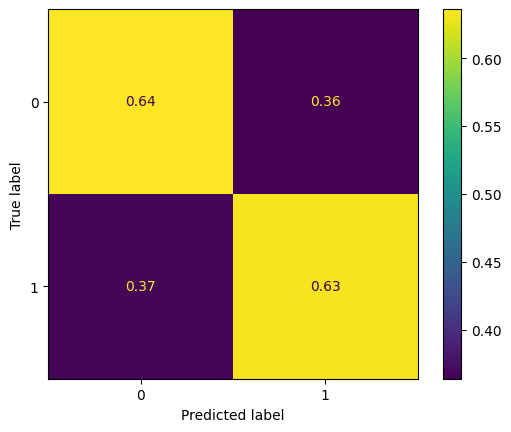

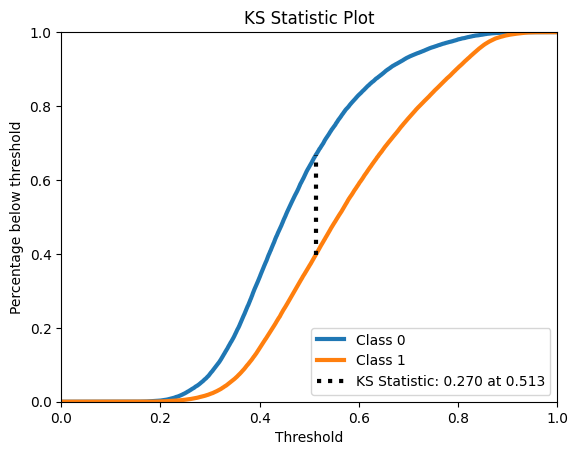

In [ ]:
rf_pred_class_test = rf_classifier.predict(x_test.to_numpy())
y_pred_rf_test = pred_name_columns(rf_pred_class_test)
my_metrics(y_test2,y_pred_rf_test)


rf_prb_test = rf_classifier.predict_proba(x_test)
skplt.metrics.plot_ks_statistic(y_test2.to_numpy().ravel(), rf_prb_test)
plt.show()

KS de 0.270 ,Auroc de 0.63 , precisao de 0.72
da pra melhorar

In [41]:

rf_classifier2 = RandomForestClassifier(n_estimators=100,
                                       max_depth=16,
                                       min_samples_leaf=8,
                                       min_samples_split=8,
                                       max_features='sqrt',
                                       criterion='gini')

rf_history = rf_classifier2.fit(x_train.to_numpy(), y_train2.to_numpy().ravel())

              precision    recall  f1-score   support

           0       0.48      0.65      0.55     33525
           1       0.77      0.63      0.70     63775

    accuracy                           0.64     97300
   macro avg       0.63      0.64      0.62     97300
weighted avg       0.67      0.64      0.65     97300

Erro quadrático médio:  0.3618705035971223
Auroc: 0.6408580688481451
Precisão média:  0.7306114557237124



/home/pedro-milet/.local/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


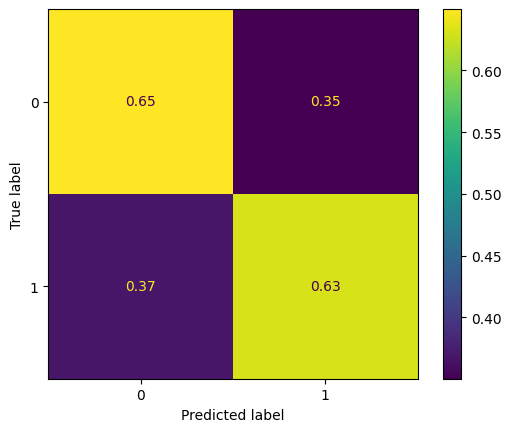

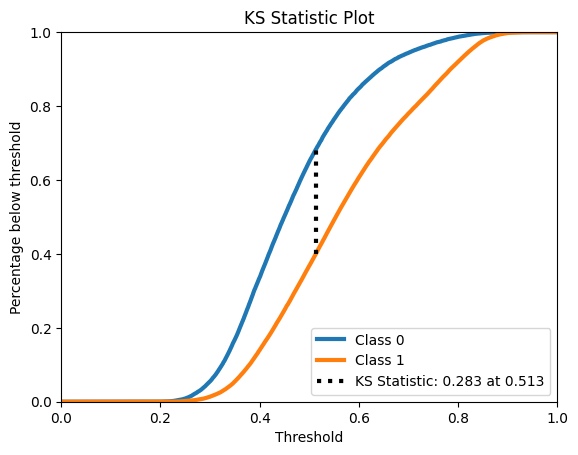

In [43]:
rf_pred_class_test = rf_classifier2.predict(x_test.to_numpy())
y_pred_rf_test = pred_name_columns(rf_pred_class_test)
my_metrics(y_test2,y_pred_rf_test)


rf_prb_test = rf_classifier2.predict_proba(x_test)
skplt.metrics.plot_ks_statistic(y_test2.to_numpy().ravel(), rf_prb_test)
plt.show()

Conseguimos melhorar KS 0.283 , auroc 0.640 , precisao 0.730

In [ ]:
sys.exit("Execution stopped. Please run cells above this one individually.")

## Gradient Boost

Para o gradient boost foi feito do uso do optuna para achar os melhores hiper-parâmetros do classificador

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

In [39]:
def gb(trial):
    loss                = trial.suggest_categorical("loss", ["deviance", "exponential"])
    max_depth           = trial.suggest_int("max_depth", 64, 128)
    subsample           = trial.suggest_float("subsample", 0.001, 0.1)
    n_estimators        = trial.suggest_int("n_estimators", 16, 100)
    learning_rate       = trial.suggest_float("learning_rate", 0.001, 0.1)
    min_samples_leaf    = trial.suggest_int("min_samples_leaf", 2, 5)
    
    gradient_boost = GradientBoostingClassifier(n_estimators = n_estimators, 
                                            max_depth = max_depth, 
                                            min_samples_leaf = min_samples_leaf, 
                                            learning_rate = learning_rate, 
                                            loss = loss, 
                                            subsample = subsample).fit(x_train.to_numpy(), y_train2.to_numpy().ravel())

    gb_pred_class_test = gradient_boost.predict(x_test.to_numpy())

    y_pred_gb_test = pred_name_columns(gb_pred_class_test)

    acc = accuracy_score(y_test2,y_pred_gb_test)
    return acc

study_2 = optuna.create_study(direction="maximize")
study_2.optimize(gb, n_trials=64)

[I 2023-04-19 12:10:25,815] A new study created in memory with name: no-name-31a34f57-0031-428d-998f-a9d13169afe3
[I 2023-04-19 12:11:44,142] Trial 0 finished with value: 0.6177595066803699 and parameters: {'loss': 'exponential', 'max_depth': 125, 'subsample': 0.07072894079063337, 'n_estimators': 27, 'learning_rate': 0.07445285935552863, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.6177595066803699.
[I 2023-04-19 12:15:35,172] Trial 1 finished with value: 0.6310791366906475 and parameters: {'loss': 'exponential', 'max_depth': 85, 'subsample': 0.06324711195828359, 'n_estimators': 99, 'learning_rate': 0.033441738037814805, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.6310791366906475.
/home/pedro-milet/.local/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
[I 2023-04-19 12:19:36,

[I 2023-04-19 13:24:45,093] Trial 22 finished with value: 0.6362487153134635 and parameters: {'loss': 'exponential', 'max_depth': 118, 'subsample': 0.08603079462018967, 'n_estimators': 87, 'learning_rate': 0.011378443432405218, 'min_samples_leaf': 3}. Best is trial 14 with value: 0.6374820143884892.
[I 2023-04-19 13:30:54,147] Trial 23 finished with value: 0.6362795477903391 and parameters: {'loss': 'exponential', 'max_depth': 120, 'subsample': 0.0915958039548111, 'n_estimators': 89, 'learning_rate': 0.014504284284913339, 'min_samples_leaf': 2}. Best is trial 14 with value: 0.6374820143884892.
[I 2023-04-19 13:37:55,205] Trial 24 finished with value: 0.6365262076053443 and parameters: {'loss': 'exponential', 'max_depth': 120, 'subsample': 0.09323307096321706, 'n_estimators': 90, 'learning_rate': 0.023874717269751128, 'min_samples_leaf': 2}. Best is trial 14 with value: 0.6374820143884892.
[I 2023-04-19 13:43:33,330] Trial 25 finished with value: 0.6385200411099692 and parameters: {'los

/home/pedro-milet/.local/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
[I 2023-04-19 15:30:59,342] Trial 46 finished with value: 0.6371223021582734 and parameters: {'loss': 'deviance', 'max_depth': 64, 'subsample': 0.08896476136744262, 'n_estimators': 95, 'learning_rate': 0.03268801993499566, 'min_samples_leaf': 3}. Best is trial 42 with value: 0.639825282631038.
/home/pedro-milet/.local/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
[I 2023-04-19 15:36:10,058] Trial 47 finished with value: 0.6307913669064749 and parameters: {'loss': 'deviance', 'max_depth': 77, 'subsample': 0.07684019401292026, 'n_est

[I 2023-04-19 16:43:06,091] Trial 60 finished with value: 0.6402261048304214 and parameters: {'loss': 'deviance', 'max_depth': 85, 'subsample': 0.09979717919389981, 'n_estimators': 92, 'learning_rate': 0.012222444345513374, 'min_samples_leaf': 4}. Best is trial 56 with value: 0.6430113052415211.
/home/pedro-milet/.local/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
[I 2023-04-19 16:48:46,052] Trial 61 finished with value: 0.637934224049332 and parameters: {'loss': 'deviance', 'max_depth': 85, 'subsample': 0.09941696761037465, 'n_estimators': 92, 'learning_rate': 0.00878585907919182, 'min_samples_leaf': 4}. Best is trial 56 with value: 0.6430113052415211.
/home/pedro-milet/.local/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was depre

In [ ]:
optuna.visualization.plot_optimization_history(study_2)

In [41]:
optuna.visualization.plot_slice(study_2)

In [42]:
optuna.visualization.plot_param_importances(study_2)

In [43]:
study_2.best_params

{'loss': 'deviance',
 'max_depth': 80,
 'subsample': 0.09440391156675204,
 'n_estimators': 100,
 'learning_rate': 0.017155254760404283,
 'min_samples_leaf': 3}

Vemos que o melhor resultado foi com os parametros 
{'loss': 'deviance',
 'max_depth': 80,
 'subsample': 0.09440391156675204,
 'n_estimators': 100,
 'learning_rate': 0.017155254760404283,
 'min_samples_leaf': 3}

In [44]:
gradient_boost = GradientBoostingClassifier(n_estimators = 100, 
                                            max_depth = 80, 
                                            min_samples_leaf = 3, 
                                            learning_rate = 0.017155254760404283, 
                                            loss = 'deviance', 
                                            subsample = 0.09440391156675204).fit(x_train.to_numpy(), y_train2.to_numpy().ravel())

/home/pedro-milet/.local/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.



              precision    recall  f1-score   support

           0       0.48      0.61      0.54     33525
           1       0.76      0.66      0.71     63775

    accuracy                           0.64     97300
   macro avg       0.62      0.63      0.62     97300
weighted avg       0.67      0.64      0.65     97300

Erro quadrático médio:  0.3581089414182939
Auroc: 0.6347221001779946
Precisão média:  0.7262969176610568



/home/pedro-milet/.local/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but GradientBoostingClassifier was fitted without feature names



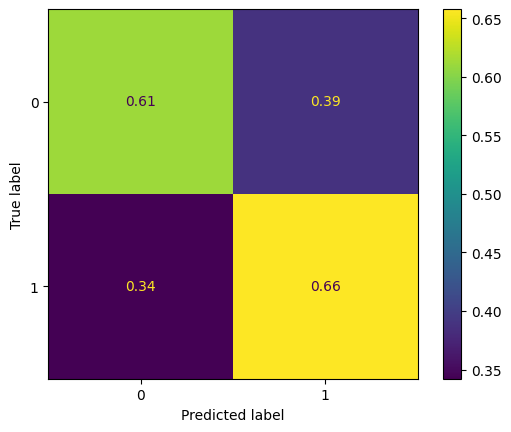

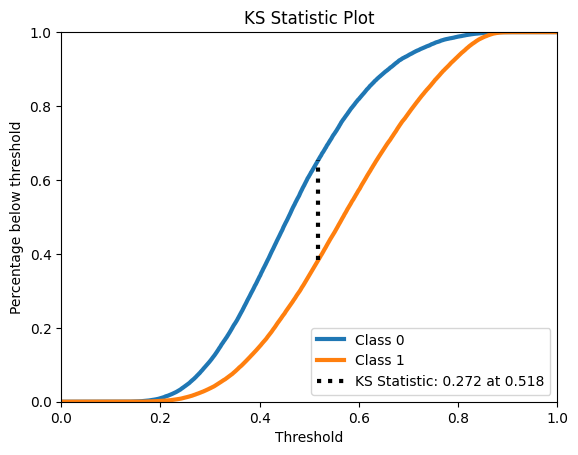

In [45]:
gb_pred_class_test = gradient_boost.predict(x_test.to_numpy())
y_pred_gb_test = pred_name_columns(gb_pred_class_test)
my_metrics(y_test2,y_pred_gb_test)


gb_prb_test = gradient_boost.predict_proba(x_test)
skplt.metrics.plot_ks_statistic(y_test2.to_numpy().ravel(), gb_prb_test)
plt.show()

KS de 0.272 , auroc de 0.634 ,precisao de 0.726

##Ensemble

In [44]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from tensorflow import keras
from keras.models import Model
from keras import layers, optimizers, losses
# from tensorflow.keras import layers, optimizers, losses
from sklearn.neural_network import MLPClassifier
from scipy import stats

In [45]:
y_train2.describe()

,IND_BOM_1_1
count,255098.000000
mean,0.500000
std,0.500001
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [46]:
print(y_train)
print(y_train2)

        IND_BOM_1_1  IND_BOM_1_2
272438            0            1
166215            0            1
150565            1            0
321740            0            1
350643            0            1
...             ...          ...
264992            0            1
269389            0            1
156630            1            0
235033            1            0
56724             0            1

[255098 rows x 2 columns]
        IND_BOM_1_1
272438            0
166215            0
150565            1
321740            0
350643            0
...             ...
264992            0
269389            0
156630            1
235033            1
56724             0

[255098 rows x 1 columns]


Criamos um classificador de Ensemble por votação, usando 3 classificadores diferentes encontrados anteriormente

/home/pedro-milet/.local/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/pedro-milet/.local/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/pedro-milet/.local/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.64      0.67      0.65     63774
           1       0.65      0.62      0.64     63774

    accuracy                           0.64    127548
   macro avg       0.65      0.64      0.64    127548
weighted avg       0.65      0.64      0.64    127548

Erro quadrático médio:  0.35527017279769185
Auroc: 0.6447298272023082
Precisão média:  0.5944488333412319



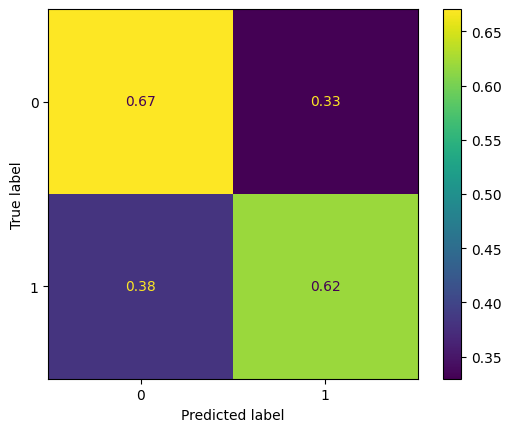

In [47]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, BaggingClassifier, VotingClassifier
mlp1 = MLPClassifier(random_state=1, 
                    max_iter=10000,
                    solver='sgd',
                    activation='logistic',
                    learning_rate= 'adaptive',
                    learning_rate_init=0.0856084197423055,
                    hidden_layer_sizes=(13),
                    early_stopping=True).fit(x_train.to_numpy(), y_train2.to_numpy().ravel())

mlp2 = MLPClassifier(random_state=1, 
                    max_iter=10000,
                    solver='sgd',
                    activation='logistic',
                    learning_rate= 'adaptive',
                    learning_rate_init=0.0856084197423055,
                    hidden_layer_sizes=(32),
                    early_stopping=True).fit(x_train.to_numpy(), y_train2.to_numpy().ravel())

rf_classifier = RandomForestClassifier(n_estimators=100,
                                       max_depth=16,
                                       min_samples_leaf=8,
                                       min_samples_split=8,
                                       max_features='sqrt',
                                       criterion='gini')


ensemble_classifier = VotingClassifier(
            estimators=[('mlp1', mlp1), ('rf', rf_classifier), ('mlp2', mlp2)], 
            voting='soft')

mlp1.fit(x_train.to_numpy(), y_train2.to_numpy().ravel())
rf_classifier.fit(x_train.to_numpy(), y_train2.to_numpy().ravel())
mlp2.fit(x_train.to_numpy(), y_train2.to_numpy().ravel())
ensemble_classifier.fit(x_train.to_numpy(), y_train2.to_numpy().ravel())

ensemble_pred_class_val = ensemble_classifier.predict(x_validate)
y_pred_ensemble_val = pred_name_columns(ensemble_pred_class_val)
my_metrics(y_validate,y_pred_ensemble_val)

/home/pedro-milet/.local/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/pedro-milet/.local/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/pedro-milet/.local/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


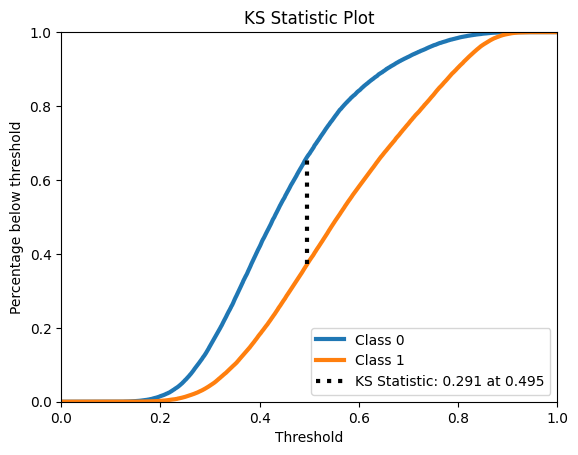

/home/pedro-milet/.local/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/pedro-milet/.local/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/pedro-milet/.local/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.48      0.67      0.56     33525
           1       0.78      0.62      0.69     63775

    accuracy                           0.64     97300
   macro avg       0.63      0.64      0.62     97300
weighted avg       0.68      0.64      0.64     97300

Erro quadrático médio:  0.36439876670092497
Auroc: 0.6433366277966763
Precisão média:  0.7324934160719663



/home/pedro-milet/.local/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/pedro-milet/.local/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/pedro-milet/.local/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


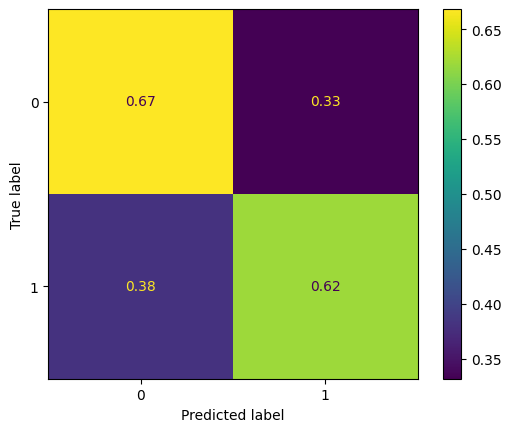

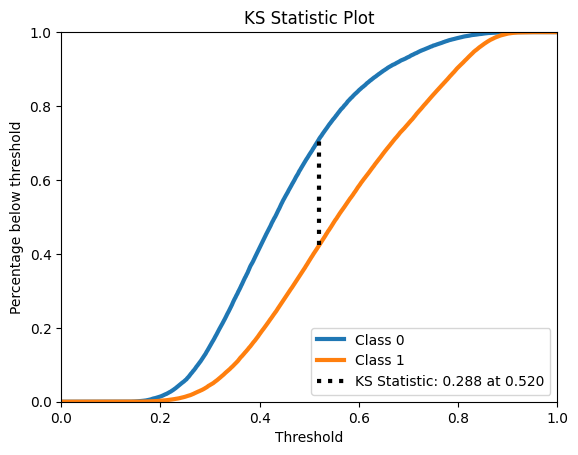

In [48]:
# Calculamos o KS do ensemble no validation
ensemble_prb_val = ensemble_classifier.predict_proba(x_validate)
skplt.metrics.plot_ks_statistic(y_validate['IND_BOM_1_1'], ensemble_prb_val)
plt.show()

# Pegamos auroc e precisao 
ensemble_pred_class_test = ensemble_classifier.predict(x_test)
y_pred_ensemble_test = pred_name_columns(ensemble_pred_class_test)
my_metrics(y_test,y_pred_ensemble_test)

# Calculamos o KS do ensemble no test
ensemble_prb_test = ensemble_classifier.predict_proba(x_test)
skplt.metrics.plot_ks_statistic(y_test['IND_BOM_1_1'], ensemble_prb_test)
plt.show()

1. Auroc 0.64 precisao 0.73
2. KS no ds de teste 0.288
3. Ks no ds de validation 0.291

# Resultados finais 
## MLP 1
1. auroc 0.63 , precisao 0.72
2. KS no ds de teste 0.277 
## MLP 2
1. Auroc 0.638 , precisao 0.730
2. KS no ds de teste 0.279
## RF
1. Auroc de 0.63 , precisao de 0.72
2. KS no ds de teste 0.270
## RF2
1. Auroc 0.640 , precisao 0.730
2. KS no ds de teste 0.283

## GB
1. Auroc de 0.634 ,precisao de 0.726
2. KS no ds de teste 0.272

## Ensemble
1. Auroc 0.64 precisao 0.73
2. KS no ds de teste 0.288
3. Ks no ds de validation 0.291

# Conclusões


1. Nosso melhor modelo gerado foi o Ensemble 
2. O Gradient boosting poderia ser melhor tunado pois os resultados foram abaixo do esperado